## Data Exploration

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from acquire import get_titanic_data
from prepare import prep_titanic_data

df = prep_titanic_data(get_titanic_data())

In [2]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1


In [4]:
df.isnull().sum()

passenger_id         0
survived             0
pclass               0
sex                  0
age                177
sibsp                0
parch                0
fare                 0
embarked             0
class                0
embark_town          0
alone                0
embarked_encode      0
dtype: int64

In [ ]:
# df = acquire.get_titanic_data()

In [ ]:
# import prepare

In [ ]:
# df = prepare.handle_missing_values(df)

In [ ]:
# df = df.assign(embark_town = df.embark_town.fillna('Other'))

In [ ]:
# df = df.assign(embarked  = df.embarked.fillna('O'))

In [ ]:
# df = df.drop(columns=['deck'])

In [ ]:
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# encoder = LabelEncoder()

In [ ]:
# encoder.fit(df.embarked)

In [ ]:
# df = df.assign(embarked_encode = encoder.transform(df.embarked))

In [5]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'embark_town', 'alone', 'embarked_encode'],
      dtype='object')

In [6]:
df.embarked_encode.value_counts()

3    644
0    168
2     77
1      2
Name: embarked_encode, dtype: int64

In [7]:
df.isnull().sum()/df.count()

passenger_id       0.000000
survived           0.000000
pclass             0.000000
sex                0.000000
age                0.247899
sibsp              0.000000
parch              0.000000
fare               0.000000
embarked           0.000000
class              0.000000
embark_town        0.000000
alone              0.000000
embarked_encode    0.000000
dtype: float64

In [8]:
df = df[pd.notna(df.age)]
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train, test = train_test_split(df, test_size = 0.3, random_state = 123, stratify = df[['survived']])

In [11]:
train.shape

(499, 13)

In [12]:
test.shape

(215, 13)

In [13]:
train.survived.value_counts()

0    296
1    203
Name: survived, dtype: int64

In [14]:
test.survived.value_counts()

0    128
1     87
Name: survived, dtype: int64

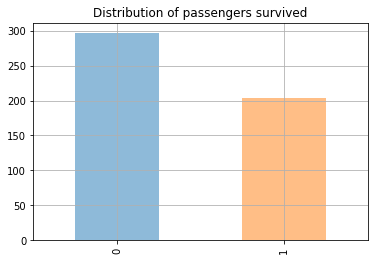

In [15]:
train.survived.value_counts().plot(kind='bar',alpha=.5)
plt.title("Distribution of passengers survived")
plt.grid(b = True , which = "major")

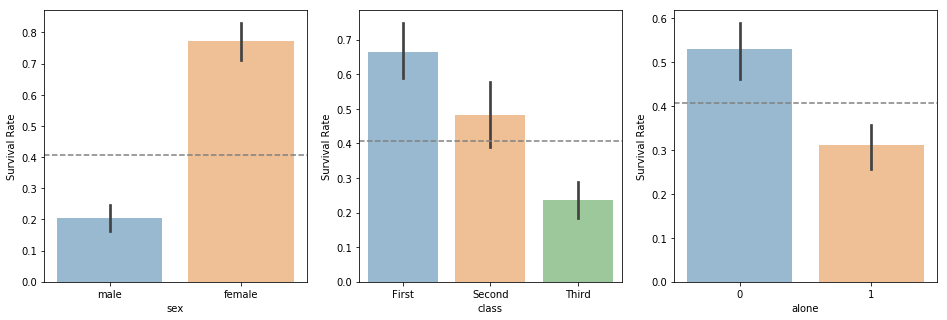

In [16]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

survial rate for females and males alone and not alone

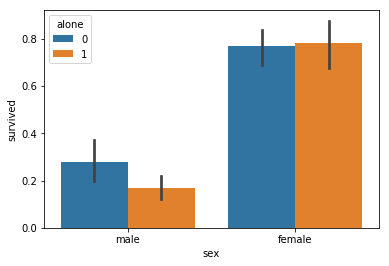

In [17]:
sns.barplot('sex', 'survived', data=train, hue='alone')

below is the same thing as above

In [18]:
train.groupby(['sex','alone'])['survived'].count()

sex     alone
female  0        112
        1         65
male    0        107
        1        215
Name: survived, dtype: int64

In [19]:
df_family = train[train['alone'] == 0]

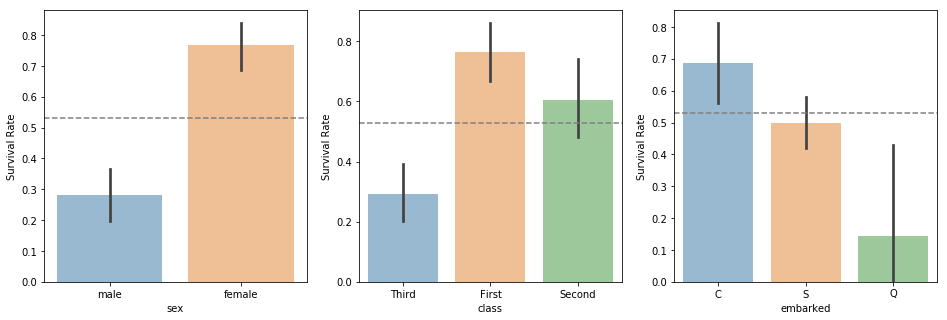

In [20]:
features = ['sex', 'class','embarked']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = df_family.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=df_family, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [21]:
pd.crosstab(df_family['class'], df_family.embarked, margins=True).style.background_gradient(cmap='YlOrRd')

embarked,C,Q,S,All
class,,,,
First,24,2,46,72
Second,8,0,50,58
Third,16,5,68,89
All,48,7,164,219


In [22]:
pd.crosstab(df_family['class'], df_family.embarked, margins=True)
#.style.background_gradient(cmap='YlOrRd')

embarked,C,Q,S,All
class,,,,
First,24,2,46,72
Second,8,0,50,58
Third,16,5,68,89
All,48,7,164,219


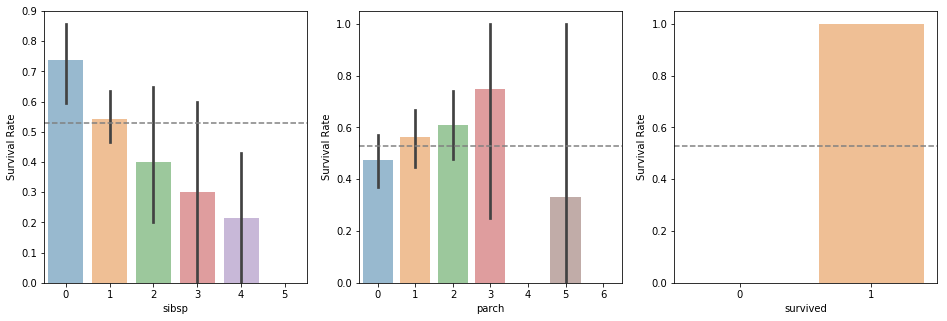

In [23]:
features = ['sibsp', 'parch','survived']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = df_family.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=df_family, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

encode and or scale at the end

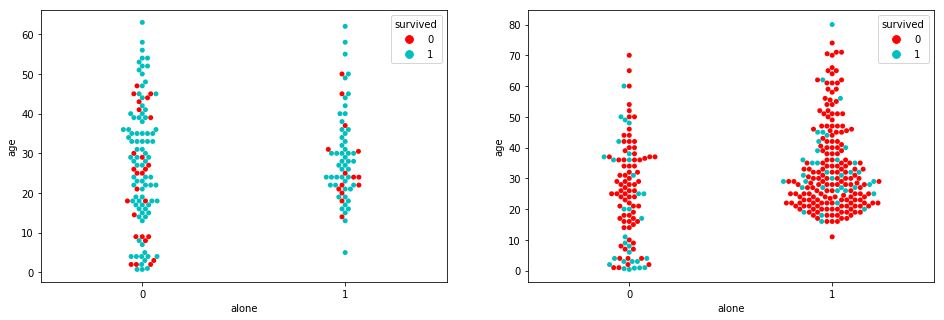

In [24]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="alone", y="age", hue="survived", palette=["r", "c", "y"], ax=ax[0],data=train[train['sex']=='female'])
sns.swarmplot(x="alone", y="age", hue="survived", palette=["r", "c", "y"], ax=ax[1],data=train[train['sex']=='male'])